<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
breast_cancer_csv = pd.read_csv('../../DATA/breast-cancer-wisconsin-data.csv')

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [4]:
breast_cancer_csv.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
breast_cancer_csv.shape

(569, 33)

In [6]:
breast_cancer_csv.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#drop unnamed column
breast_cancer_csv.drop(['Unnamed: 32'], axis=1, inplace=True)

In [8]:
breast_cancer_csv.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# Target Column
breast_cancer_csv.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
#make target binary
diagnosis_map={'B':0, 'M':1}
breast_cancer_csv['diagnosis']= breast_cancer_csv['diagnosis'].map(diagnosis_map)

In [11]:
breast_cancer_csv.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
breast_cancer_csv.corr()['diagnosis'].sort_values(ascending=True)

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
y=breast_cancer_csv['diagnosis']
y.head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis, Length: 100, dtype: int64

In [15]:
X=breast_cancer_csv.drop(['diagnosis','id'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [17]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [18]:
# predict test class:
ytestpred=model.predict(X_test)
print(ytestpred[:])
print(ytestpred.shape)

[0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0]
(171,)


In [19]:
y_trainpred= model.predict(X_train)
print(y_trainpred[:])
print(y_trainpred.shape)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0]
(398,)


In [20]:
# predicted test probability:
ytestprob=model.predict_proba(X_test)
print(ytestprob[0:5])

[[5.58666508e-01 4.41333492e-01]
 [3.86809536e-01 6.13190464e-01]
 [9.98223884e-01 1.77611557e-03]
 [3.41868859e-04 9.99658131e-01]
 [1.35413268e-01 8.64586732e-01]]


In [21]:
score= accuracy_score(y_train, y_trainpred)
score

0.9447236180904522

In [22]:
score=accuracy_score(y_test,ytestpred)
score

0.935672514619883

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ytestpred)

In [28]:
# ANSWER
cm_df=pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                   columns=['predicted_cancer','predicted_healthy'])
cm_df

,predicted_cancer,predicted_healthy
is_cancer,102,6
is_healthy,5,58


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [29]:
# ANSWER
# use float to perform true division, not integer division
TP = confusion_matrix(y_test, ytestpred)[1, 1]
TN = confusion_matrix(y_test, ytestpred)[0, 0]
FP = confusion_matrix(y_test, ytestpred)[0, 1]
FN = confusion_matrix(y_test, ytestpred)[1, 0]

model_accuracy=(TP + TN) / float(TP + TN + FP + FN)
model_accuracy

0.935672514619883

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [30]:
# ANSWER
AS= accuracy_score(y_test,ytestpred)
AS

0.935672514619883

In [31]:
MISCLASSIFICATIONRATE=1-AS
MISCLASSIFICATIONRATE

0.06432748538011701

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [32]:
# ANSWER
recall= TP / float(FN + TP)
recall

0.9206349206349206

In [33]:
from sklearn.metrics import recall_score, precision_score
sensitivity= recall_score(y_test,ytestpred)
sensitivity

0.9206349206349206

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [34]:
# ANSWER
specificity = TN / (TN + FP)
specificity

0.9444444444444444

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [35]:
# ANSWER
print(1 - specificity)

0.05555555555555558


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [36]:
# ANSWER
print(precision_score(y_test, ytestpred))

0.90625


#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [37]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
Y_pp = pd.DataFrame(model.predict_proba(X_test), columns=['class_B_pp','class_M_pp'])
Y_pp.head(10)

,class_B_pp,class_M_pp
0,0.558667,0.441333
1,0.386810,0.613190
2,0.998224,0.001776
3,0.000342,0.999658
4,0.135413,0.864587
5,0.000582,0.999418
6,0.000002,0.999998
7,0.003614,0.996386
8,0.981537,0.018463
9,0.987770,0.012230


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [38]:
from sklearn.metrics import roc_curve, auc

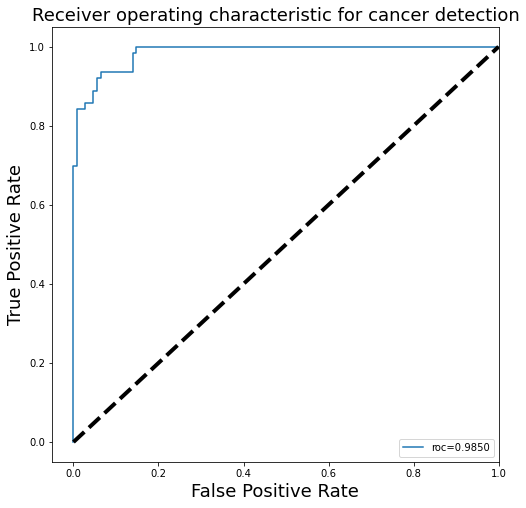

In [39]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr,tpr,treshold = roc_curve(y_test, Y_pp['class_M_pp'])
roc_auc = auc(fpr,tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr,tpr, label='roc=%.4f'%roc_auc)
# Plot fpr, tpr
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



